In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/SVM_dataset/winequality-white.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['quality'] = (df['quality'] > 6).astype(int)

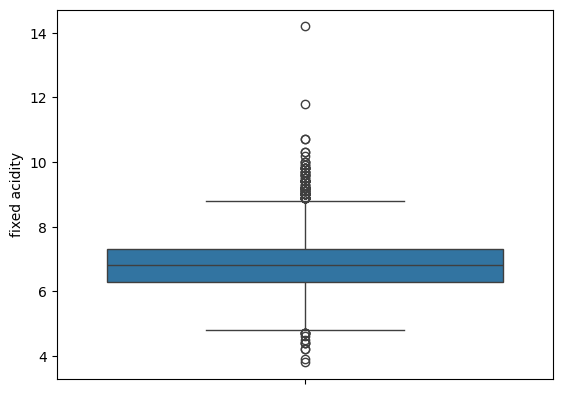

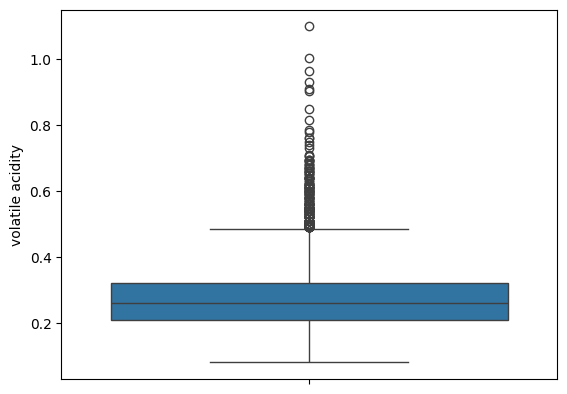

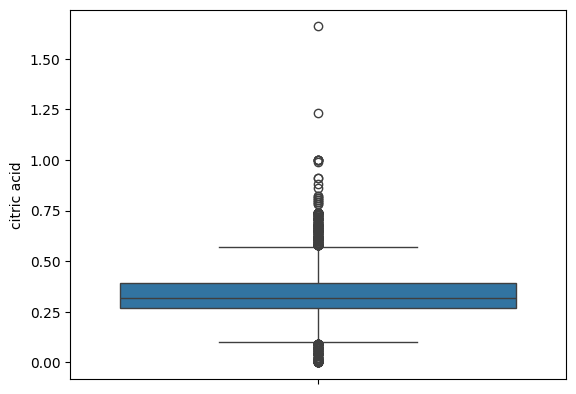

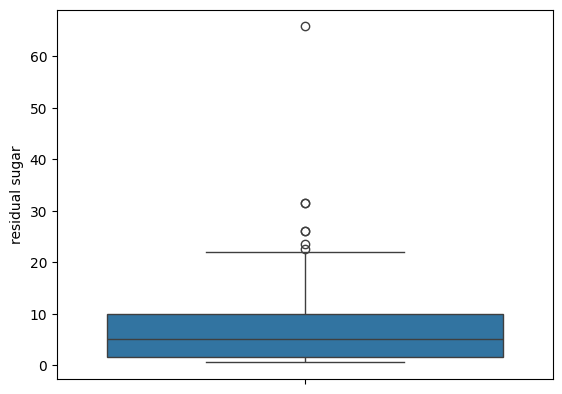

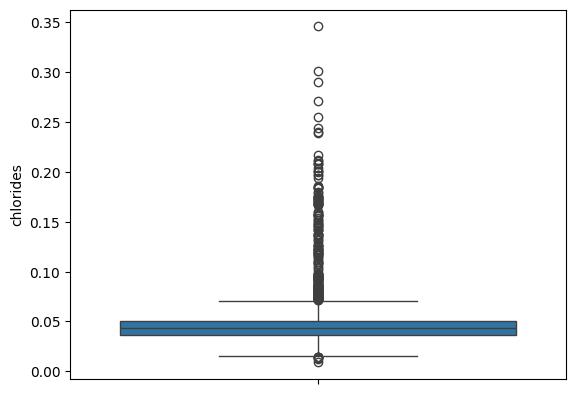

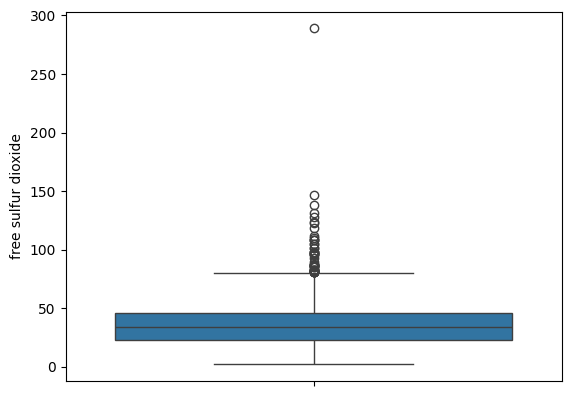

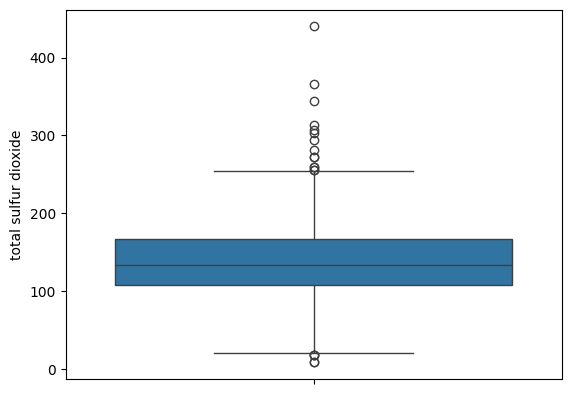

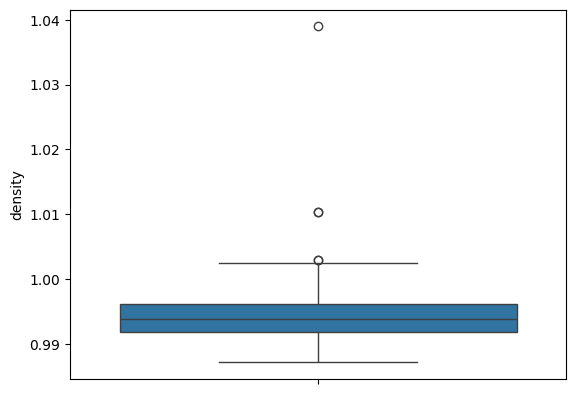

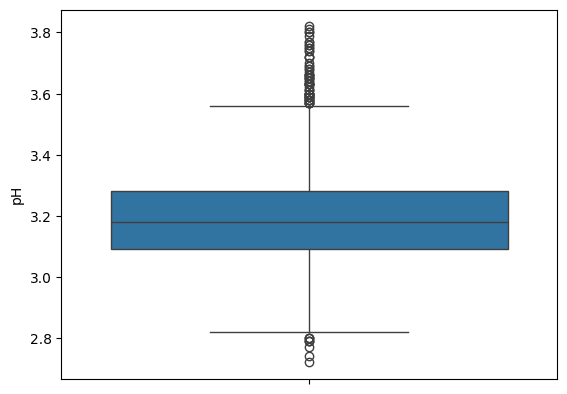

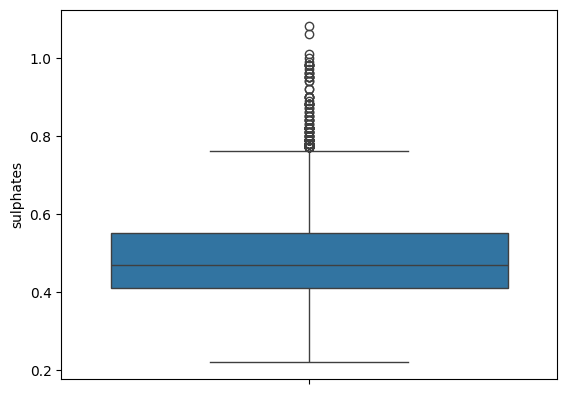

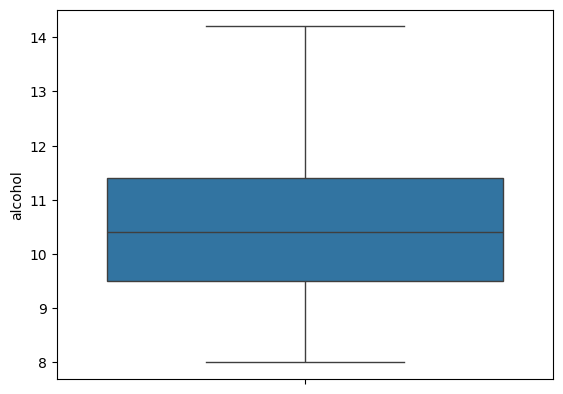

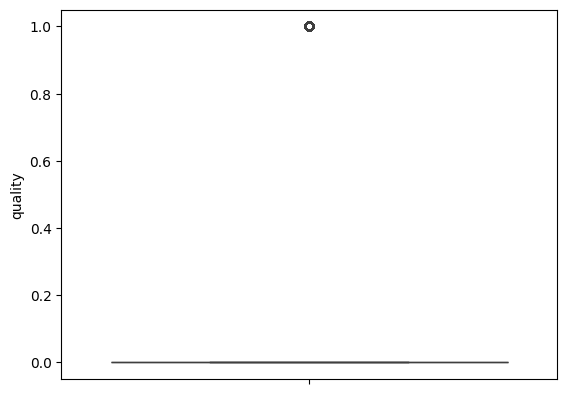

In [ ]:
for n in df:
  sns.boxplot(df[n])
  plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
def detect_outliers_iqr (series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((series.values < lower_bound) | (series.values > upper_bound)).any()

outlier_columns = [col for col in df.columns if detect_outliers_iqr(df[col])]

df_processed = df.copy()

for col in outlier_columns:
  df_processed[col] = winsorize(df_processed[col], limits=[0.05, 0.05])

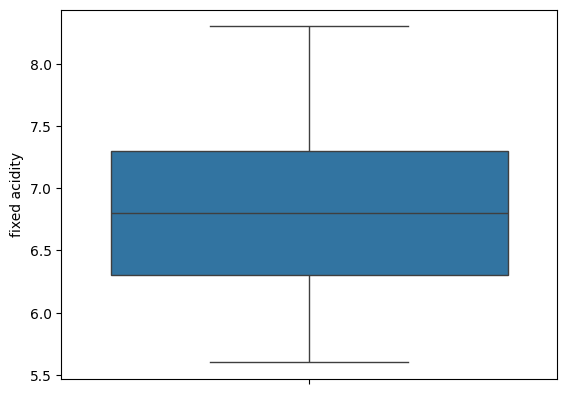

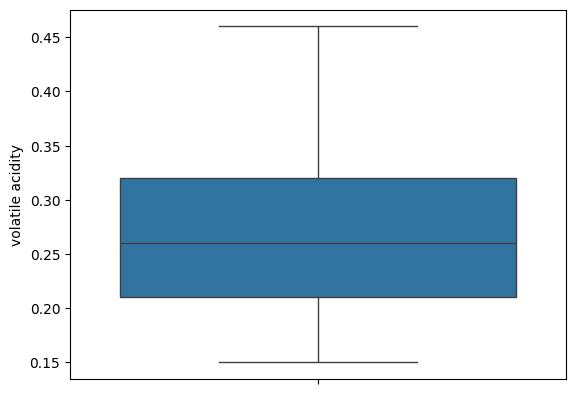

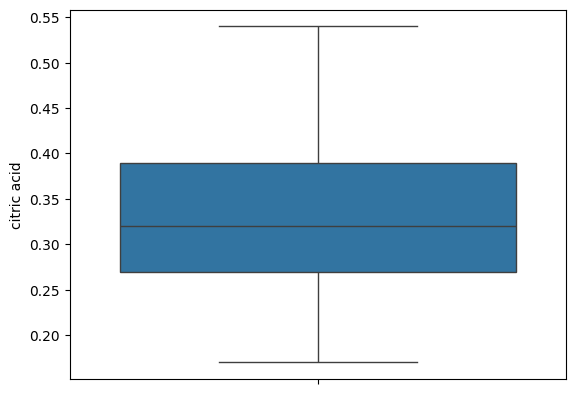

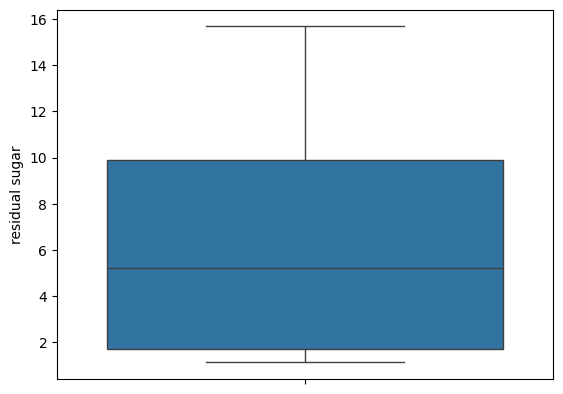

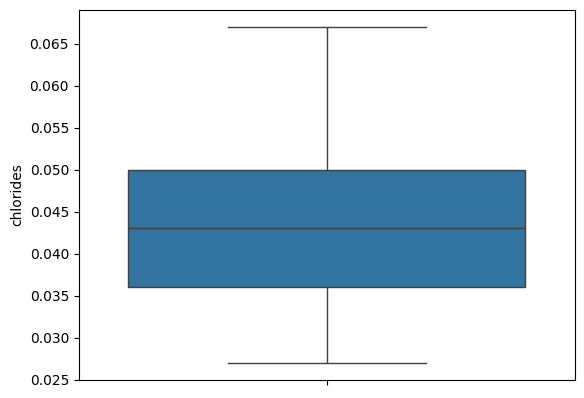

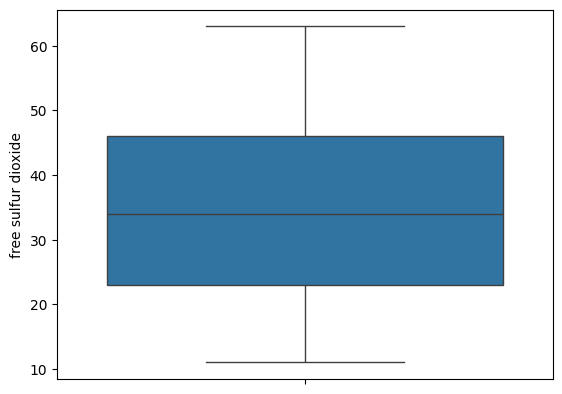

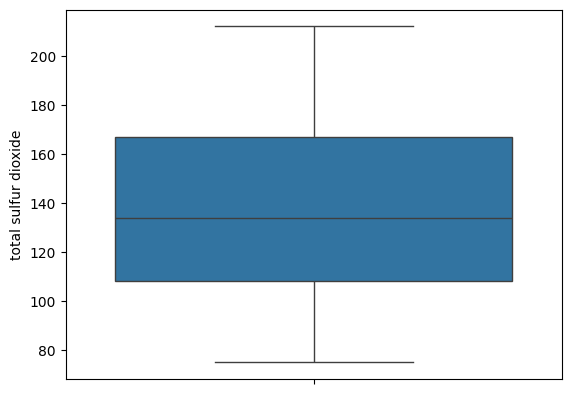

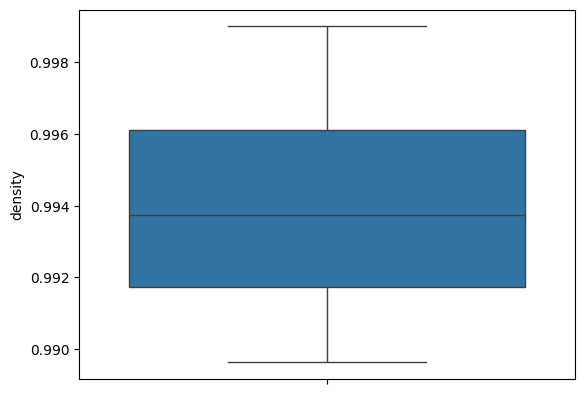

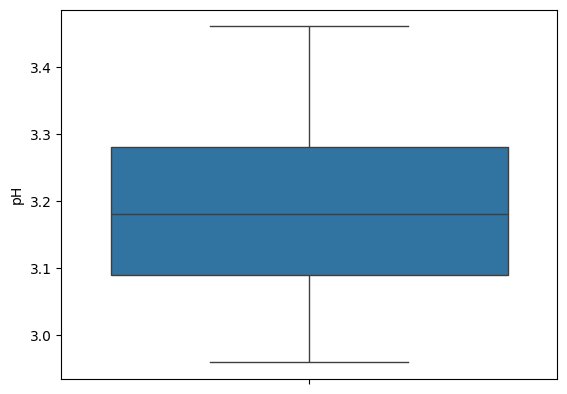

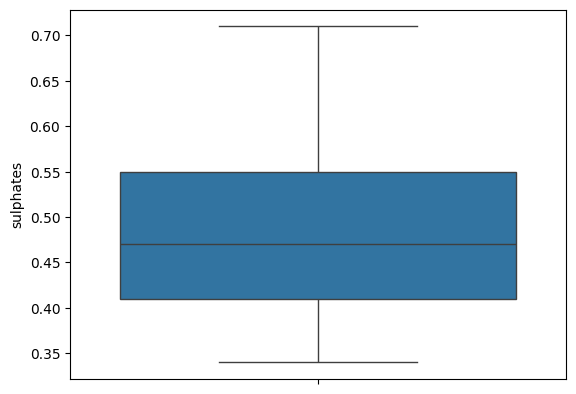

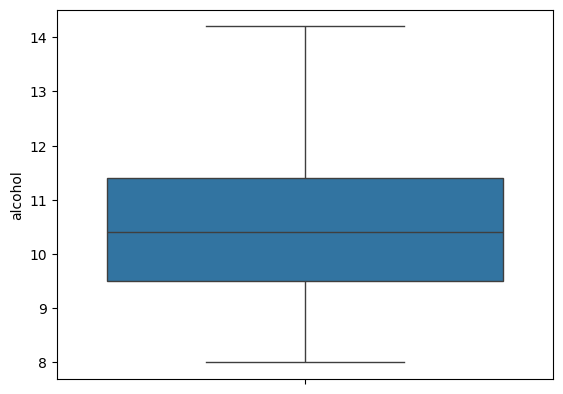

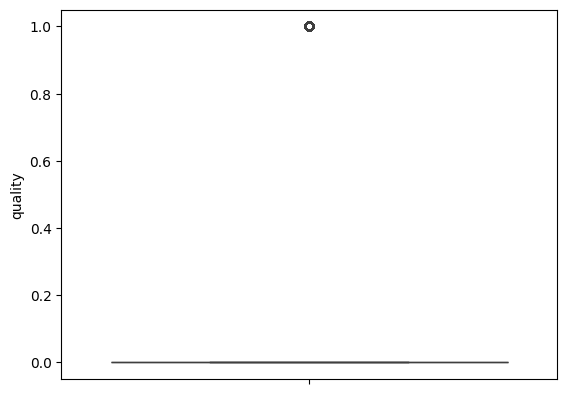

In [ ]:
for b in df_processed:
  sns.boxplot(df_processed[b])
  plt.show()

In [ ]:
X = df_processed.drop('quality', axis=1)
y = df_processed['quality']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X = lda.fit_transform(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': [0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma' : ['scale']
        }
]

In [ ]:
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, refit=True, verbose=3, n_jobs=1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.787 total time=   0.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.787 total time=   0.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.787 total time=   0.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.788 total time=   0.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.788 total time=   0.3s
[CV 1/5] END ................C=1, kernel=linear;, score=0.787 total time=   0.4s
[CV 2/5] END ................C=1, kernel=linear;, score=0.787 total time=   0.4s
[CV 3/5] END ................C=1, kernel=linear;, score=0.787 total time=   0.3s
[CV 4/5] END ................C=1, kernel=linear;, score=0.788 total time=   0.7s
[CV 5/5] END ................C=1, kernel=linear;, score=0.788 total time=   0.4s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.787 total time=   0.2s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': ['scale'], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
print(grid.best_params_, 'is the best parameters')
print(grid.best_score_, 'is the best score')

{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'} is the best parameters
0.8129157218442933 is the best score


In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       753
           1       0.67      0.17      0.27       227

    accuracy                           0.79       980
   macro avg       0.73      0.57      0.58       980
weighted avg       0.77      0.79      0.74       980



This is the classification report without applying PCA  
                
                precision    recall  f1-score   support

           0       0.88      0.96      0.92       753
           1       0.81      0.55      0.66       227

    accuracy                           0.87       980
  